# グラフを生成する

### モジュールのロード

In [1]:
import glob
import japanize_matplotlib
import os
import pandas as pd
import random
import sys
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# 辞書に順序がある前提で書いている可能性があるので、python3.7以上でないと正常に動作しないかもしれない
# バージョンを確認のために出力
print(sys.version)

3.8.6 (default, Oct 10 2020, 07:54:55) 
[GCC 5.4.0 20160609]


### 変数・配列の宣言

In [2]:
# 各種値を宣言
bench_marks = ['bt', 'cg', 'ep', 'ft', 'is', 'lu', 'mg', 'sp']
classes = ["S", "W", "A", "B", "C", "D"]
processes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
fix_process = 4
fix_benchmark_class = "C"
marker_size = 12
marker_fig = "v"

ベンチマーク：cg


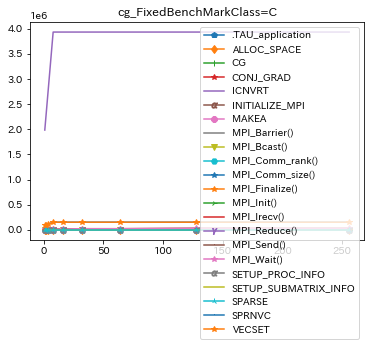

In [3]:
def show_fixed_class_graph(BenchMark="bt", Processes=[1, 2, 4, 8, 16, 32, 64, 128, 256], FixedBenchMarkClass="C"):
        print(f"ベンチマーク：{BenchMark}")
        path = './'        
        markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "*", "h", "H", "+", "x", "D", "d", "|", "_", "None", None, "", "$x$",
            "$\\alpha$", "$\\beta$", "$\\gamma$"]
        colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']      
        
        # fixed_Class にはベンチマーククラスFixedBenchMarkClassで実行プロセス数がProcessesに該当するものの結果が入る
        fixed_Class = list()

        for process in Processes:
            file_name = ("pprof_"+BenchMark+FixedBenchMarkClass+str(process)+".csv")
            file_path = path+file_name
            if (os.path.exists(file_path) and os.stat(file_path).st_size != 0):
                data_frame = pd.read_csv(path+file_name)
                data_frame = data_frame.set_index(['Name'])
                fixed_Class.append(data_frame.rename(columns = {'#Call': process}).sort_index())
        if(len(fixed_Class) != 0):
            summary_fixed_Class = pd.concat(fixed_Class, axis=1)
            summary_fixed_Class.sort_index(axis=1, inplace=True)
            summary_fixed_Class_title = BenchMark+"においてベンチマーククラスをCに固定し実行プロセス数を変化させたときの実行された全ての関数のコール回数"

            x_axes = summary_fixed_Class.columns.tolist()

            y_axes = summary_fixed_Class.index.tolist()

            plt.figure()
            for y_axis in y_axes:
                color = random.choice(colors)
                label = y_axis
                marker = random.choice(markers)
                plt.plot(x_axes, summary_fixed_Class.T[y_axis], marker=marker, label=y_axis)
            plt.legend()
            plt.title(BenchMark+"_FixedBenchMarkClass="+FixedBenchMarkClass)
            plt.show()
            
show_fixed_class_graph(BenchMark="cg")

#### show_fixed_class_graph()を再設計したもの

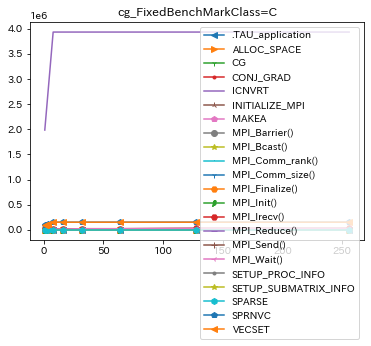

In [4]:
def return_fixed_class(BenchMark="bt", Processes=[1, 2, 4, 8, 16, 32, 64, 128, 256], FixedBenchMarkClass="C"):
        path = './'
        
        # fixed_Class にはベンチマーククラスFixedBenchMarkClassで実行プロセス数がProcessesに該当するものの結果が入る
        fixed_Class = list()

        for process in Processes:
            file_name = ("pprof_"+BenchMark+FixedBenchMarkClass+str(process)+".csv")
            file_path = path+file_name
            if (os.path.exists(file_path) and os.stat(file_path).st_size != 0):
                data_frame = pd.read_csv(path+file_name)
                data_frame = data_frame.set_index(['Name'])
                fixed_Class.append(data_frame.rename(columns = {'#Call': process}).sort_index())
        return(fixed_Class)
    
def show_fixed_class_graph(BenchMark="bt", Processes=[1, 2, 4, 8, 16, 32, 64, 128, 256], FixedBenchMarkClass="C"):

        markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "*", "h", "H", "+", "x", "D", "d", "|", "_", "None", None, "", "$x$",
            "$\\alpha$", "$\\beta$", "$\\gamma$"]
        colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf'] 
        fixed_Class = return_fixed_class(BenchMark=BenchMark, Processes=Processes, FixedBenchMarkClass=FixedBenchMarkClass)
        if(len(fixed_Class) != 0):
            summary_fixed_Class = pd.concat(fixed_Class, axis=1)
            summary_fixed_Class.sort_index(axis=1, inplace=True)
            summary_fixed_Class_title = BenchMark+"においてベンチマーククラスをCに固定し実行プロセス数を変化させたときの実行された全ての関数のコール回数"

            x_axes = summary_fixed_Class.columns.tolist()

            y_axes = summary_fixed_Class.index.tolist()

            plt.figure()
            for y_axis in y_axes:
                color = random.choice(colors)
                label = y_axis
                marker = random.choice(markers)
                plt.plot(x_axes, summary_fixed_Class.T[y_axis], marker=marker, label=y_axis)
            plt.legend()
            plt.title(BenchMark+"_FixedBenchMarkClass="+FixedBenchMarkClass)
            plt.show()
            
show_fixed_class_graph(BenchMark="cg")

ベンチマーク：cg


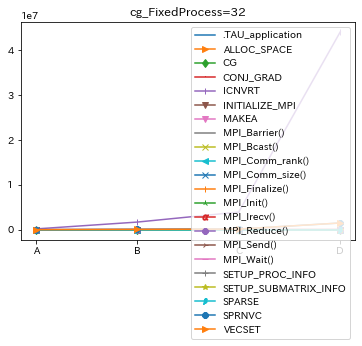

In [5]:
def show_fixed_process_graph(BenchMark="bt", BenchMarkClasses=["S", "W", "A", "B", "C", "D"], FixedProcess=32):
    path = './'
    markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "*", "h", "H", "+", "x", "D", "d", "|", "_", "None", None, "", "$x$",
 "$\\alpha$", "$\\beta$", "$\\gamma$"]
    colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']

    print(f"ベンチマーク：{BenchMark}")

    # fixed_process には実行プロセス数が64でベンチマーククラスがA ~ Dまでの結果が入る
    fixed_process = list()

    for bench_mark_class in BenchMarkClasses:
        file_name = ("pprof_"+BenchMark+bench_mark_class+str(FixedProcess)+".csv")
        file_path = path+file_name
        if (os.path.exists(file_path) and os.stat(file_path).st_size != 0):
            data_frame = pd.read_csv(path+file_name)
            data_frame = data_frame.set_index(['Name'])
            fixed_process.append(data_frame.rename(columns = {'#Call': bench_mark_class}).sort_index())

    if (len(fixed_process) != 0):
            summary_fixed_process = pd.concat(fixed_process, axis=1)

            x_axes = summary_fixed_process.columns.tolist()

            y_axes = summary_fixed_process.index.tolist()

            plt.figure()
            for y_axis in y_axes:
                color = random.choice(colors)
                label = y_axis
                marker = random.choice(markers)
                plt.plot(x_axes, summary_fixed_process.T[y_axis], marker=marker, label=y_axis)
            plt.legend()
            plt.title(BenchMark+"_FixedProcess="+str(FixedProcess))
            plt.show()
            
show_fixed_process_graph(BenchMark="cg")

#### show_fixed_process_graph()を再設計したもの

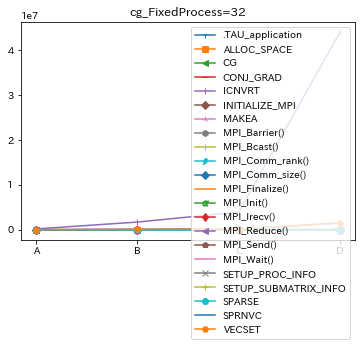

In [6]:
def return_fixed_process(BenchMark="bt", BenchMarkClasses=["S", "W", "A", "B", "C", "D"], FixedProcess=32):
    path = './'

    # fixed_process には実行プロセス数が64でベンチマーククラスがA ~ Dまでの結果が入る
    fixed_process = list()

    for bench_mark_class in BenchMarkClasses:
        file_name = ("pprof_"+BenchMark+bench_mark_class+str(FixedProcess)+".csv")
        file_path = path+file_name
        if (os.path.exists(file_path) and os.stat(file_path).st_size != 0):
            data_frame = pd.read_csv(path+file_name)
            data_frame = data_frame.set_index(['Name'])
            fixed_process.append(data_frame.rename(columns = {'#Call': bench_mark_class}).sort_index())
    return(fixed_process)
            
def show_fixed_process_graph(BenchMark="bt", BenchMarkClasses=["S", "W", "A", "B", "C", "D"], FixedProcess=32):
    fixed_process = return_fixed_process(BenchMark=BenchMark, BenchMarkClasses=BenchMarkClasses, FixedProcess=FixedProcess)
    markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "*", "h", "H", "+", "x", "D", "d", "|", "_", "None", None, "", "$x$",
 "$\\alpha$", "$\\beta$", "$\\gamma$"]
    colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']
    if (len(fixed_process) != 0):
            summary_fixed_process = pd.concat(fixed_process, axis=1)

            x_axes = summary_fixed_process.columns.tolist()

            y_axes = summary_fixed_process.index.tolist()

            plt.figure()
            for y_axis in y_axes:
                color = random.choice(colors)
                label = y_axis
                marker = random.choice(markers)
                plt.plot(x_axes, summary_fixed_process.T[y_axis], marker=marker, label=y_axis)
            plt.legend()
            plt.title(BenchMark+"_FixedProcess="+str(FixedProcess))
            plt.show()
            
show_fixed_process_graph(BenchMark="cg")

### 引数に処理するベンチマーク名・プロセス数・ベンチマーククラスを格納した配列をとり、それらを集計しつつグラフを生成する関数

In [7]:
def show_graph(BenchMarks=[], Processes=[], BenchMarkClasses=[], fix_process=4, fix_benchmark_class="C"):
    path = './'

    if (BenchMarks==[] or Processes==[] or BenchMarkClasses==[]):
        print("関数の引数となっている配列が空です。")
    else:
        for bench_mark in BenchMarks:
            show_fixed_class_graph(BenchMark=bench_mark, Processes=Processes, FixedBenchMarkClass=fix_benchmark_class)
            show_fixed_process_graph(BenchMark=bench_mark, BenchMarkClasses=BenchMarkClasses, FixedProcess=fix_process)            

bench_marks = ['bt', 'cg', 'ep', 'ft', 'is', 'lu', 'mg', 'sp']
processes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
classes = ["S", "W", "A", "B", "C", "D"]

# show_graph(bench_marks, processes, classes)

# 入力データを学習用・テスト用に分割し、実際に学習・テストを行う

* ~~上記のそれぞれのグラフを作成するのに必要なpandas dataframeに該当するものを「プロセス数を固定したもの」「ベンチマーククラスを固定したもの」でまとめる。~~
* 学習用：テスト用＝7：3で分割
    * ~~pandasなのでそれをnumpy形式でうまく取り出す~~
    * ~~numpyで横軸・縦軸を取得~~
    * ~~numpyからグラフを出力~~
    * ~~numpyデータで分割実施~~
* scikit-learnで学習
* 予測モデルの作成
* 元グラフに上書きする形でプロット

##### ベンチマークCGの結果を利用して実験を行う。

In [8]:
cg_fixed_class = return_fixed_class(BenchMark="cg")
cg_fixed_process = return_fixed_process(BenchMark="cg")

In [9]:
summary_fixed_class = pd.concat(cg_fixed_class, axis=1)

columns = summary_fixed_class.columns.to_numpy()

index = summary_fixed_class.index.to_numpy()

dict_summary_fixed_class = {"benchmarks": columns}
for index_name in index:
    dict_summary_fixed_class[index_name] = summary_fixed_class.T[index_name].to_numpy()

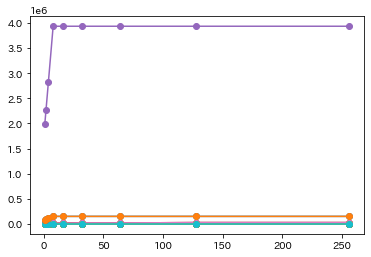

In [10]:
for index_name in index:
    plt.plot(columns, dict_summary_fixed_class[index_name], marker = 'o')

In [11]:
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

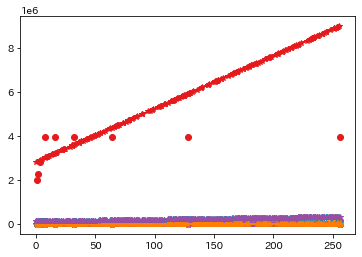

In [12]:
for index_name in index:
    _x = dict_summary_fixed_class["benchmarks"]
    _y = dict_summary_fixed_class[index_name]
    x = np.reshape(_x, (-1, 1))
    y = np.reshape(_y, (-1, 1))
#     x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)
    x_train = x[:-2]
    x_test = x[-2:]
    y_train = y[:-2]
    y_test = y[-2:]
    x_predict = np.random.rand(x.max(), 1) * x.max()
    colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']
    color = random.choice(colors)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_predict = lr.predict(x_predict)
    plt.plot(x_predict, y_predict, marker="*", color=color)
    plt.scatter(x, y, color=color)

In [13]:
summary_fixed_process = pd.concat(cg_fixed_process, axis=1)
print(summary_fixed_process)

                           A          B          C           D
Name                                                          
.TAU_application           1        1.0        1.0         1.0
ALLOC_SPACE                1        1.0        1.0         1.0
CG                         1        1.0        1.0         1.0
CONJ_GRAD                 16       76.0       76.0       101.0
ICNVRT                180347  1706010.0  3936140.0  44047200.0
INITIALIZE_MPI             1        1.0        1.0         1.0
MAKEA                      1        1.0        1.0         1.0
MPI_Barrier()              1        1.0        1.0         1.0
MPI_Bcast()                1        1.0        1.0         1.0
MPI_Comm_rank()            1        1.0        1.0         1.0
MPI_Comm_size()            1        1.0        1.0         1.0
MPI_Finalize()             1        1.0        1.0         1.0
MPI_Init()                 1        1.0        1.0         1.0
MPI_Irecv()             4208    19988.0    19988.0     